In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import Information as info
from DataLoader_RE import MyDataloader
from Engine_RE import Engine
from reformat_data import *

In [3]:
data_people = people_reformat(r"/mnt/Data1/Python_Projects/Pure-Python/P5/01-Thesis/data/Shiraze94_fa/People.xlsx")
data_family = family_reformat(r"/mnt/Data1/Python_Projects/Pure-Python/P5/01-Thesis/data/Shiraze94_fa/Family.xlsx")
data_trips = trips_reformat(r"/mnt/Data1/Python_Projects/Pure-Python/P5/01-Thesis/data/Shiraze94_fa/Trips.xlsx")

In [4]:
data_people

,questionnaire_code,person_number,gender,age,job,working,driving_license,education_level,home_area_code,home_region_code
0,11019516,1,male,58,retired,0,1,5,212,10
1,11019516,2,female,52,retired,0,1,5,212,10
2,11019516,3,male,29,employee,1,1,6,212,10
3,11019516,4,female,27,unemployed,0,1,7,212,10
4,11019516,5,male,13,school_student,0,0,2,212,10
...,...,...,...,...,...,...,...,...,...,...
61017,21034757,5,male,13,school_student,0,0,3,162,5
61018,21034778,1,female,70,housekeeper,0,0,1,117,6
61019,21034778,2,male,36,employee,1,1,4,117,6
61020,21034773,1,male,65,retired,0,1,0,116,6


In [5]:
data_family

,questionnaire_code,family_members_count,total_vehicles_count,bicycles_24inch_or_larger_count,motorcycles_count,private_cars_count,pickup_trucks_count,taxis_count,other_vehicles_count,private_car_1,private_car_2,private_car_3,private_car_4,home_area_code,home_region_code,correction_factor,expansion_factor
0,11010014,6,0,0,0,0,0,0,0,-,-,-,-,252,14,0.66181,29.56596
1,11010080,5,1,1,0,0,0,0,0,-,-,-,-,171,14,0.76409,34.47413
2,11010117,3,1,0,0,1,0,0,0,پژو 206 - سال 1390,-,-,-,307,14,1.11244,31.57090
3,11010152,4,2,1,0,1,0,0,0,پراید - سال 1390,-,-,-,83,6,0.85617,36.60944
4,11010157,4,2,1,0,1,0,0,0,تندر L90 - سال 1388,-,-,-,161,5,0.85617,17.27843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18639,32318106,1,1,0,1,0,0,0,0,-,-,-,-,27,1,1.00000,6.50000
18640,32318107,1,1,0,0,1,0,0,0,پراید - سال 1391,-,-,-,27,1,1.00000,6.50000
18641,32318108,1,0,0,0,0,0,0,0,-,-,-,-,27,1,1.00000,6.50000
18642,32318109,1,1,1,0,0,0,0,0,-,-,-,-,27,1,1.00000,6.50000


In [6]:
data_trips

,trip_code,questionnaire_code,person_number,home_area_code,home_region_code,origin_area_code,origin_region_code,destination_area_code,destination_region_code,trip_purpose,travel_mode,start_hour,start_minute,hourly_correction_factor,trip_distance,home_based,previous_trip_code
0,120670,11010014,1,252,14,252,14,128,7,visit_offices,private_car,10,15,1.7,8499.15,home_start,0
1,120671,11010014,1,252,14,128,7,252,14,return_home,private_car,14,30,1.7,7693.01,home_end,120670
2,100368,11010080,1,171,14,171,14,170,14,recreation_or_pilgrimage,taxi,7,30,1.0,2421.68,home_start,0
3,100370,11010080,1,171,14,170,14,171,14,return_home,taxi,8,35,1.0,1677.50,home_end,100368
4,100371,11010080,1,171,14,171,14,6,1,shopping,city_bus,12,37,1.0,7807.36,home_start,100370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93936,107679,32318109,1,27,1,30,1,27,1,return_home,bicycle,18,30,1.0,1141.41,home_end,107678
93937,107672,32318110,1,27,1,27,1,30,1,education,city_bus,9,30,1.0,1268.87,home_start,0
93938,107673,32318110,1,27,1,30,1,27,1,return_home,taxi,14,0,1.0,1141.41,home_end,107672
93939,107674,32318110,1,27,1,27,1,30,1,education,city_bus,17,20,1.0,1268.87,home_start,107673


In [7]:
seed = 1
dataloader = MyDataloader(data_list=[data_people, data_family, data_trips], seed=seed)
dd = dataloader.data


In [8]:
dd

,destination_area_code,origin_area_code,origin_region_code,start_hour,start_minute,hourly_correction_factor,trip_distance,previous_trip_code,gender,age,...,job_5,job_6,job_7,job_8,job_9,job_10,job_11,job_12,job_13,job_14
0,127,251,14,10,15,1.7,8499.15,0,1,44,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,251,127,7,14,30,1.7,7693.01,120670,1,44,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,169,170,14,7,30,1.0,2421.68,0,1,47,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,170,169,14,8,35,1.0,1677.50,100368,1,47,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,170,14,12,37,1.0,7807.36,100370,1,47,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93936,26,29,1,18,30,1.0,1141.41,107678,1,21,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
93937,29,26,1,9,30,1.0,1268.87,0,1,21,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
93938,26,29,1,14,0,1.0,1141.41,107672,1,21,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
93939,29,26,1,17,20,1.0,1268.87,107673,1,21,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
model = Engine(data=dataloader.data, seed=seed)
model.fit(model="sklearn")

[INFO] Data splitted to X with (93937, 71) and Y with (93937, 1).
[INFO] Fitting 'scikit-learn' LogisticRegression model...
[INFO] We are training on (93937, 71) and (93937, 1) number os samples.
Epoch 1, change: 1


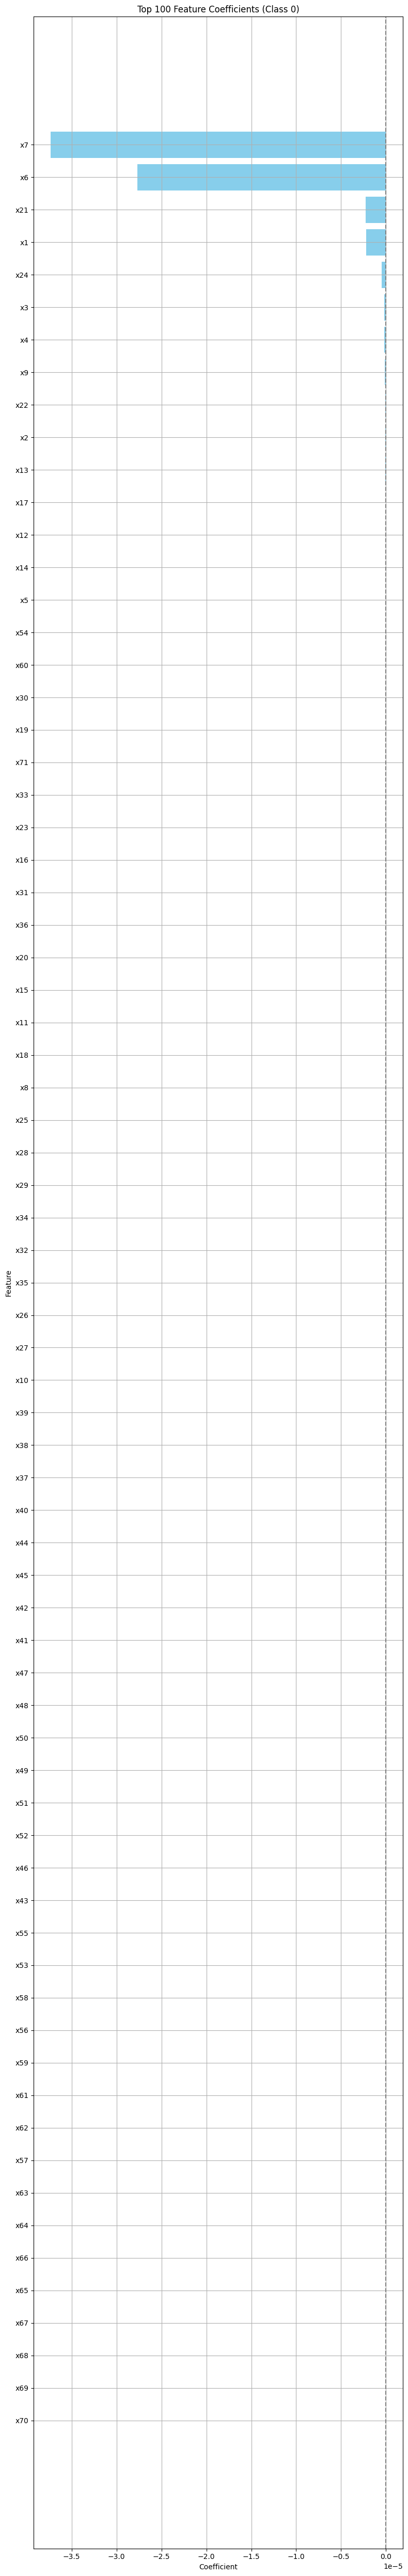

In [9]:
model.weight_plot_sklearn(top_k=100)

[WARNING] Feature names not found in self.data. Falling back to positional indexing.


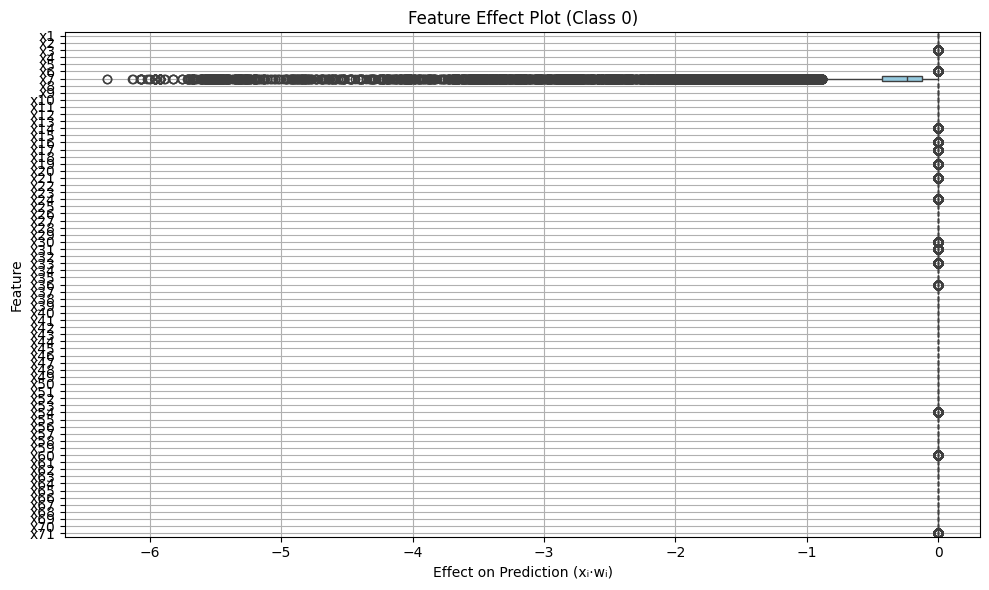

In [8]:
model.effect_plot_sklearn()